In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:\\machine learning practice\\Bank churn prediction\\Customer-Churn-Records.csv")
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1569,1570,15670823,Hsueh,651,Germany,Female,42,1,116646.76,1,1,0,44731.80,1,1,2,DIAMOND,658
2824,2825,15667938,Hurst,628,France,Male,32,9,149136.31,2,1,1,16402.11,0,0,3,GOLD,859
1862,1863,15726494,Romani,481,France,Male,44,9,175303.06,1,1,0,65500.53,1,1,4,PLATINUM,408
3281,3282,15707634,Anenechukwu,775,France,Female,32,2,108698.96,2,1,1,161069.73,0,0,4,PLATINUM,236
8627,8628,15777830,Hutchinson,639,France,Female,42,4,0.00,2,0,0,167682.37,0,0,2,GOLD,968


In [5]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
data.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [8]:
cat_col = data.select_dtypes(include='object').columns
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [9]:
for col in cat_col :
    print(data[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [10]:
data.Gender = data.Gender.apply(lambda x: x=='Male').astype(int)
data.Gender.unique()

array([0, 1])

In [11]:
order = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}

data['Card Type'] = [order[val] for val in data['Card Type']]
data['Card Type'].unique()

array([3, 1, 0, 2], dtype=int64)

In [12]:
dummy_df = pd.get_dummies(data['Geography'])
dummy_df.columns

Index(['France', 'Germany', 'Spain'], dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  int32  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int32(1), int64(11), object(1)
memory u

In [14]:
data = pd.concat([data, dummy_df], axis = 1)
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,France,Germany,Spain
5146,850,Germany,1,32,2,128647.98,2,0,0,54416.18,0,0,2,0,607,False,True,False
5685,705,Spain,0,47,3,63488.70,1,0,1,28640.92,1,1,4,3,555,False,False,True
3884,709,France,1,31,6,0.00,2,1,1,71009.84,0,0,4,2,316,True,False,False
3295,754,Spain,0,19,9,0.00,1,1,0,189641.11,0,0,3,0,933,False,False,True
3944,612,France,0,31,8,117989.76,1,1,1,54129.86,0,0,4,0,409,True,False,False


In [15]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  int32  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
 15  France              10000 non-null  bool   
 16  Germa

In [16]:
data.rename(columns = {'Card Type':'CardType', 'Satisfaction Score': 'SatisfactionScore', 'Point Earned': 'PointsEarned'}, inplace = True)
data.drop('Geography', axis = 1, inplace =True)
data.shape

(10000, 17)

In [19]:
tar_col = 'Exited'
cols = data.columns.tolist()
cols.remove(tar_col)
len(cols)


16

In [20]:
cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'SatisfactionScore',
 'CardType',
 'PointsEarned',
 'France',
 'Germany',
 'Spain']

<Axes: xlabel='Exited', ylabel='count'>

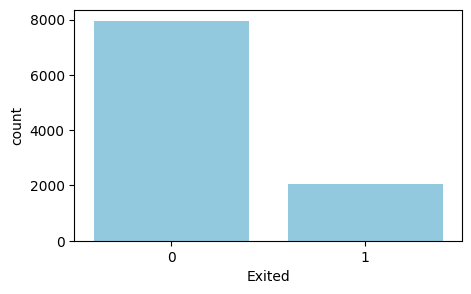

In [22]:
plt.figure(figsize = (5,3))
sns.countplot(data = data,  x = tar_col, color='skyblue')

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(data[cols])
x

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -1.00280393,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ...,  0.99720391,
        -0.57873591, -0.57380915]])

In [24]:
from sklearn.model_selection import train_test_split
y = data[tar_col]
x.shape, y.shape

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.75, random_state = len(x))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size = 0.4, random_state = len(x))

x_train.shape, x_val.shape, x_test.shape

((7500, 16), (1500, 16), (1000, 16))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
base_model = LogisticRegression().fit(x_train, y_train)
def pred_acc(y, y_hat):
    return precision_score(y, y_hat)*100
train_pred = base_model.predict(x_train)
val_pred = base_model.predict(x_val)
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_val, val_pred)))

Training Accuracy = 99.4802 %
Validation Accuracy = 99.3464 %


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split = 20).fit(x_train, y_train)
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_val, val_pred)))

Training Accuracy = 99.8042 %
Validation Accuracy = 99.3421 %


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, min_samples_split = 25).fit(x_train, y_train)
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_val, val_pred)))

Training Accuracy = 99.4802 %
Validation Accuracy = 99.3464 %


In [29]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 50).fit(x_train, y_train)
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_val, val_pred)))

Training Accuracy = 100.0000 %
Validation Accuracy = 99.3464 %


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential([
    Input((x_train.shape[1],)),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.compile(
    loss = BinaryCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

history = model.fit(x_train, y_train, epochs = 25, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6906 - loss: 0.5761 - val_accuracy: 0.8187 - val_loss: 0.3115
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.2524 - val_accuracy: 0.9820 - val_loss: 0.1128
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0787 - val_accuracy: 0.9967 - val_loss: 0.0365
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0202 - val_accuracy: 0.9973 - val_loss: 0.0229
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0100 - val_accuracy: 0.9973 - val_loss: 0.0202
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9984 - loss: 0.0093 - val_accuracy: 0.9973 - val_loss: 0.0197
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9987 - loss: 0.0082 - val_accuracy: 0.9973 - val_loss: 0.0197
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0095 - val_accuracy: 0.

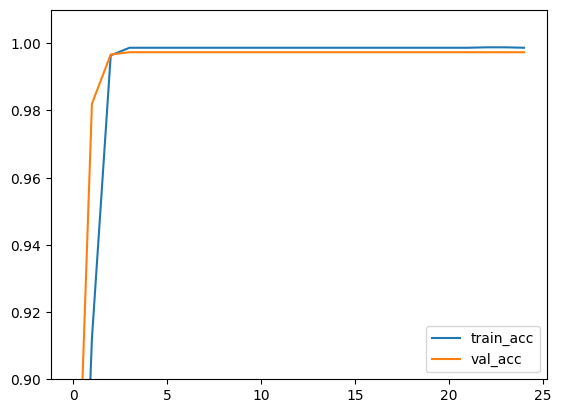

In [34]:
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.ylim(0.9,1.01)
plt.legend()

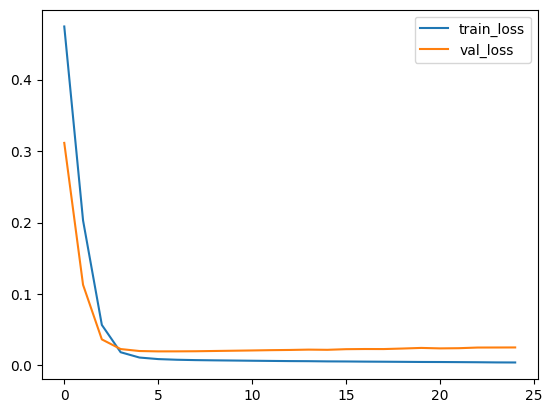

In [35]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [36]:
train_pred = (model.predict(x_train) > 0.5).astype(int)
val_pred = (model.predict(x_val) > 0.5).astype(int)
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_val, val_pred)))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training Accuracy = 99.4805 %
Validation Accuracy = 99.3464 %


In [37]:
test_pred = (model.predict(x_test) > 0.5).astype(int)
print('Test Accuracy = {:.4f} %'.format(pred_acc(test_pred, y_test)))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy = 100.0000 %
